<a href="https://colab.research.google.com/github/smile177/frekuensigempa/blob/main/Frekuensi_Gempa_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw_data_string = """Pulau,,,
,Frekuensi Gempa Berdasarkan Kekuatan Menurut Pulau di Indonesia_ (Magnitudo),,
,Kecil (<4.0),Menengah (4.0–5.0),Besar (>5.0)
,2024,2024,2024
Sumatera,795,217,28
Jawa,800,185,17
Bali,75,12,-
Nusa Tenggara,1300,159,8
Kalimantan,26,9,1
Sulawesi,1638,312,27
Maluku,660,499,38
Papua,433,194,9
Indonesia,5727,1587,128
"""

In [ ]:
df = pd.read_csv(io.StringIO(raw_data_string), sep=',', skiprows=3, header=1)

In [ ]:
print("Data awal:")
print(df.head())

Data awal:
        Sumatera   795  217  28
0           Jawa   800  185  17
1           Bali    75   12   -
2  Nusa Tenggara  1300  159   8
3     Kalimantan    26    9   1
4       Sulawesi  1638  312  27


In [ ]:
df = df.iloc[:, [0, 1, 2, 3]]
df.columns = ['Pulau', 'Kecil', 'Menengah', 'Besar']

In [ ]:
df = df[df['Pulau'] != 'Indonesia']

In [ ]:
df['Kecil'] = pd.to_numeric(df['Kecil'], errors='coerce').fillna(0)
df['Menengah'] = pd.to_numeric(df['Menengah'], errors='coerce').fillna(0)
df['Besar'] = pd.to_numeric(df['Besar'], errors='coerce').fillna(0)

In [ ]:
print("\nData yang sudah dibersihkan:")
print(df)


Data yang sudah dibersihkan:
           Pulau  Kecil  Menengah  Besar
0           Jawa    800       185   17.0
1           Bali     75        12    0.0
2  Nusa Tenggara   1300       159    8.0
3     Kalimantan     26         9    1.0
4       Sulawesi   1638       312   27.0
5         Maluku    660       499   38.0
6          Papua    433       194    9.0


In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')

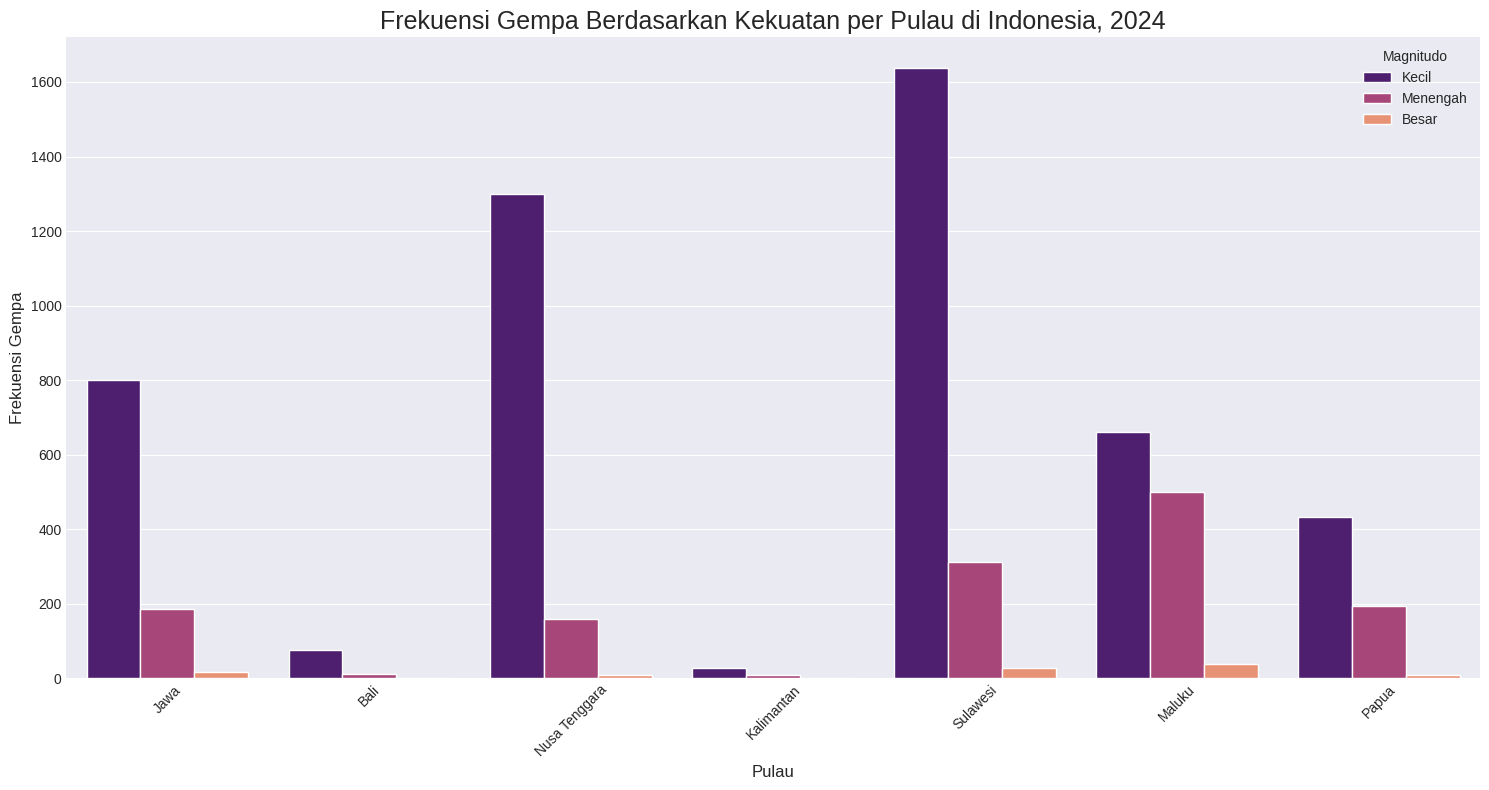

In [ ]:
df_long = pd.melt(df, id_vars=['Pulau'], var_name='Magnitudo', value_name='Frekuensi')

plt.figure(figsize=(15, 8))
sns.barplot(data=df_long, x='Pulau', y='Frekuensi', hue='Magnitudo', palette='magma')
plt.title('Frekuensi Gempa Berdasarkan Kekuatan per Pulau di Indonesia, 2024', fontsize=18)
plt.xlabel('Pulau', fontsize=12)
plt.ylabel('Frekuensi Gempa', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

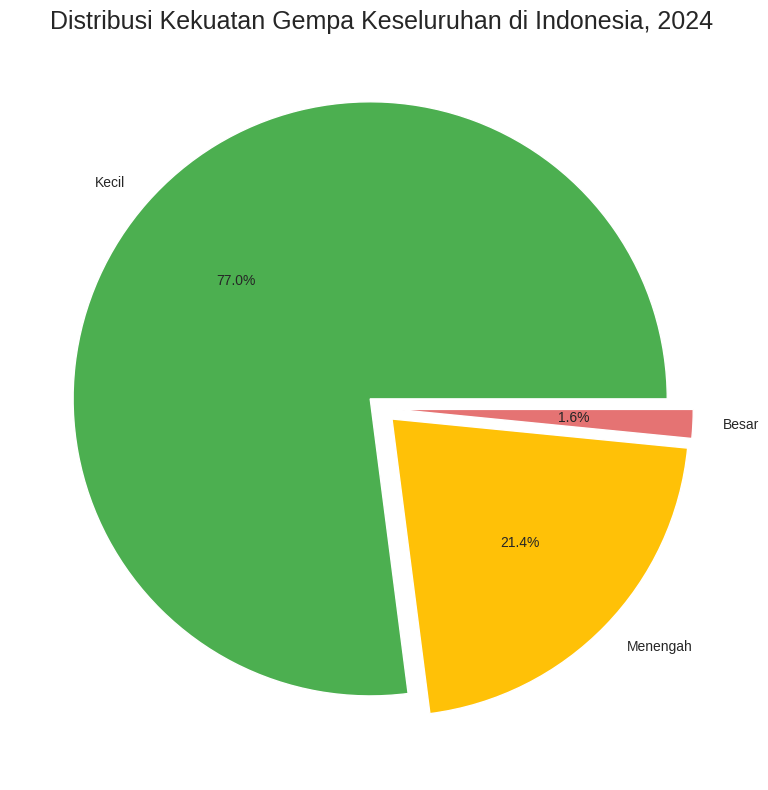

In [ ]:
magnitude_totals = df[['Kecil', 'Menengah', 'Besar']].sum()

plt.figure(figsize=(8, 8))
plt.pie(magnitude_totals, labels=magnitude_totals.index, autopct='%1.1f%%', colors=['#4CAF50', '#FFC107', '#E57373'], explode=[0.05, 0.05, 0.05])
plt.title('Distribusi Kekuatan Gempa Keseluruhan di Indonesia, 2024', fontsize=18)
plt.ylabel('') # Hapus label y
plt.tight_layout()
plt.show()

In [ ]:
total_gempa_kecil = magnitude_totals['Kecil']
total_gempa_menengah = magnitude_totals['Menengah']
total_gempa_besar = magnitude_totals['Besar']

print(f"\nRingkasan Temuan:")
print(f"Total gempa kecil (<4.0): {total_gempa_kecil} kasus")
print(f"Total gempa menengah (4.0-5.0): {total_gempa_menengah} kasus")
print(f"Total gempa besar (>5.0): {total_gempa_besar} kasus")

pulau_gempa_tertinggi = df.loc[df['Kecil'].idxmax(), 'Pulau']
print(f"\nPulau dengan frekuensi gempa kecil tertinggi adalah: {pulau_gempa_tertinggi}")

pulau_gempa_tertinggi_besar = df.loc[df['Besar'].idxmax(), 'Pulau']
print(f"\nPulau dengan frekuensi gempa besar tertinggi adalah: {pulau_gempa_tertinggi_besar}")



Ringkasan Temuan:
Total gempa kecil (<4.0): 4932.0 kasus
Total gempa menengah (4.0-5.0): 1370.0 kasus
Total gempa besar (>5.0): 100.0 kasus

Pulau dengan frekuensi gempa kecil tertinggi adalah: Sulawesi

Pulau dengan frekuensi gempa besar tertinggi adalah: Maluku
